In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from functions.Pre_processing_models import *
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import RandomOverSampler 

from functions.Pre_processing_Casos_Graves import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection._search import GridSearchCV
from sklearn.model_selection._split import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, SelectFdr

from sklearn.metrics import f1_score, precision_score, recall_score

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import metrics

#### Lendo o dataset:

In [36]:
df = pd.read_csv(r'C:\Users\maril\OneDrive\Área de Trabalho\Estudo_dados_de_covid\Data\Casos Graves\df_casos_graves')

#### Utilizando a class de pré-processamento para preparar o dataset:

In [37]:
list_features = ["SYMPTOM_COUGH",'SYMPTOM_COLD','SYMPTOM_AIR_INSUFFICIENCY','SYMPTOM_FEVER','SYMPTOM_LOW_OXYGEN_SATURATION','SYMPTOM_BREATHING_CONDITION','SYMPTOM_TORACIC_APERTURE','SYMPTOM_THROAT_CONDITION',
                'SYMPTOM_HEADACHE','SYMPTOM_BODY_PAIN','SYMPTOM_DIARRHEA','SYMPTOM_RUNNY_NOSE','SYMPTOM_NOSE_CONGESTION','SYMPTOM_WEAKNESS','SYMPTOM_ANOSMIA_OR_HYPOSMIA','SYMPTOM_NAUSEA','SYMPTOM_LACK_OF_APPETITE',
                'SYMPTOM_ABDOMINAL_PAIN','SYMPTOM_CONSCIOUSNESS_DEGRADATION','DISEASE_HEART_OR_VASCULAR','DISEASE_DIABETES','DISEASE_HYPERTENSION','DISEASE_RESPIRATORY','DISEASE_OBESITY','DISEASE_KIDNEY','DISEASE_IMMUNOSUPPRESSION',
                'DISEASE_TABAGIST','DISEASE_ETILISM','DISEASE_LIVER','DISEASE_NEUROLOGIC','death', 'idade', 'sexo_Feminino','sexo_Masculino', 'data_notificacao']

In [38]:
Pre_processing_models_df = Pre_processing_models(df)
Pre_processing_models_df.run_graves()

df = Pre_processing_models_df.df
df = df[list_features]
df['data_notificacao'] = pd.to_datetime(df['data_notificacao'])
df = df.sort_values(by='data_notificacao', ascending=True)
df = df.reset_index()
df = df.drop("index", axis=1)
df

C:\Users\maril\AppData\Local\Temp\ipykernel_14752\3432879523.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['data_notificacao'] = pd.to_datetime(df['data_notificacao'])


,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0.356522,0,1,2020-02-26
1,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0.278261,0,1,2020-02-26
2,1,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0.217391,1,0,2020-02-27
3,1,0,1,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0.278261,0,1,2020-02-27
4,1,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0.260870,1,0,2020-02-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36430,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,1,0,2022-06-12
36431,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.556522,0,1,2022-06-12
36432,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.573913,1,0,2022-06-12
36433,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,0,1,2022-06-13


In [ ]:
# df2 = pd.DataFrame()
# df2 = df
# df2.set_index('data_notificacao', inplace=True)
# df2.sort_index(inplace=True)
# df2

### Criação de uma função para configuração do modelo:

In [39]:
from sklearn.svm import SVC

def SVC_model (X_train, y_train):
    param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf', 'linear', 'sigmoid']}
    

    # Init classifier
    svc_cl = SVC()

    # prepare the cross-validation procedure
    cv = RepeatedKFold(n_splits = 5, n_repeats = 10, random_state = 1)

    # Init Grid Search
    grid_cv = GridSearchCV(svc_cl, param_grid, n_jobs = -1, cv=5, scoring = "roc_auc")

    # Fit 
    grid_cv.fit(X_train, y_train)

    mean_test_score = grid_cv.cv_results_['mean_test_score'].mean()
    std_test_score = grid_cv.cv_results_['std_test_score'].mean()
    best_score = grid_cv.best_score_
    best_params = grid_cv.best_params_

    #print(f"mean_test_score: {grid_cv.cv_results_['mean_test_score']}")
    #print(f"std_test_score: {grid_cv.cv_results_['std_test_score']}")
    #print('')

    print('#'*40)
    #print(f"mean_test_score: {grid_cv.cv_results_['mean_test_score'].mean()}")
    #print(f"std_test_score: {grid_cv.cv_results_['std_test_score'].mean()}")
    print('')
    print(f'best_score: {grid_cv.best_score_}')
    print(f'best_params_: {grid_cv.best_params_}')
    print('#'*40)
    print('')

    return mean_test_score, std_test_score, best_score, best_params

### Criação de uma função para aplicação do modelo:

In [40]:
def apply_model_svc(df):
    list_random_states = [42]

    mean_test_scores = []
    std_test_scores = []
    best_scores = []
    best_params = []

    #treino!
    data_inicio = df['data_notificacao'][0]
    data_fim = df['data_notificacao'][0]+pd.Timedelta(days=90)
    
    treino = df[(df['data_notificacao'] >= data_inicio) & (df['data_notificacao'] <= data_fim )]
    X_train = treino.drop(labels=['death', 'data_notificacao'], axis=1)
    y_train = treino['death']

    #teste!
    teste = df[(df['data_notificacao'] > data_fim)]
    X_test = teste.drop(labels=['death', 'data_notificacao'], axis=1)
    y_test = teste['death']

    oversample = RandomOverSampler(sampling_strategy='minority')
    X_over, y_over = oversample.fit_resample(X_train, y_train)


    for random_state in list_random_states:

        mean_test_score, std_test_score, best_score, best_param = SVC_model(X_over, y_over)

        mean_test_scores.append(mean_test_score)
        std_test_scores.append(std_test_score)
        best_scores.append(best_score)
        best_params.append(best_param)

    return (X_over, y_over, X_test, y_test, mean_test_scores, std_test_scores, best_scores, best_params)

### Criação de uma função para imprimir as métricas do classificador final de cada modelo:

In [72]:
from sklearn.svm import SVC

def final_cl(X_over, y_over, X_test, y_test, C, gamma, kernel):

    # parametrizando o modelo final
    #final_cl = SVC(C=C, gamma=gamma, kernel=kernel)
    final_cl = make_pipeline(StandardScaler(), SVC(C=C, gamma=gamma, kernel=kernel))
    #treinando o modelo final
    final_cl.fit(X_over, y_over)
    preds = final_cl.predict(X_test)
    accuracy_score(y_test, preds)

    print('accuracy_score:', accuracy_score(y_test, preds))
    print('#'*40)

    print('"""Métricas f1_score:"""')
    print('f1: ', f1_score(y_test, preds))
    print('Macro: ', f1_score(y_test, preds, average='macro'))
    print('Micro: ', f1_score(y_test, preds, average='micro'))
    print('weighted: ', f1_score(y_test, preds, average='weighted'))
    print('#'*40)
    print('"""Métricas precision_score:"""')
    print('Precision: ', precision_score(y_test, preds))
    print('Macro: ', precision_score(y_test, preds, average='macro'))
    print('Micro: ', precision_score(y_test, preds, average='micro'))
    print('weighted: ', precision_score(y_test, preds, average='weighted'))

    return preds, final_cl

### Criação de uma função para gerar a matriz de confusão e classification report:

In [42]:
def conf_matrix (X_test, y_test, preds, final_cl):

    confusion_matrix(y_test, preds)
    matrix = plot_confusion_matrix(final_cl, X_test, y_test, cmap=plt.cm.Blues)
    plt.show()
    print(classification_report(y_test, preds))


def roc_curve(y_test, preds):

    roc_auc_score(y_test, preds, multi_class='ovr')

    fpr, tpr, _ = metrics.roc_curve(y_test,  preds)
    auc = metrics.roc_auc_score(y_test, preds)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()

### Teste com o Período 1 (26/02/2020 até 23/08/2020):

In [43]:
#Periodo 1
data_inicio = df['data_notificacao'][0]
data_fim = df['data_notificacao'][0]+pd.Timedelta(days=180)

df_1 = df[(df['data_notificacao'] >= data_inicio) & (df['data_notificacao'] < data_fim )]
df_1

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0.356522,0,1,2020-02-26
1,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0.278261,0,1,2020-02-26
2,1,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0.217391,1,0,2020-02-27
3,1,0,1,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0.278261,0,1,2020-02-27
4,1,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0.260870,1,0,2020-02-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16124,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,1,0,2020-08-23
16125,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.417391,0,1,2020-08-23
16126,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.521739,1,0,2020-08-23
16127,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.095652,0,1,2020-08-23


In [44]:
last_date = df_1.iloc[16128]
last_date

SYMPTOM_COUGH                                          1
SYMPTOM_COLD                                           0
SYMPTOM_AIR_INSUFFICIENCY                              1
SYMPTOM_FEVER                                          1
SYMPTOM_LOW_OXYGEN_SATURATION                          0
SYMPTOM_BREATHING_CONDITION                            0
SYMPTOM_TORACIC_APERTURE                               0
SYMPTOM_THROAT_CONDITION                               0
SYMPTOM_HEADACHE                                       0
SYMPTOM_BODY_PAIN                                      0
SYMPTOM_DIARRHEA                                       0
SYMPTOM_RUNNY_NOSE                                     0
SYMPTOM_NOSE_CONGESTION                                0
SYMPTOM_WEAKNESS                                       0
SYMPTOM_ANOSMIA_OR_HYPOSMIA                            0
SYMPTOM_NAUSEA                                         0
SYMPTOM_LACK_OF_APPETITE                               0
SYMPTOM_ABDOMINAL_PAIN         

In [45]:
X_over, y_over, X_test, y_test, mean_test_scores, std_test_scores, best_scores, best_params = apply_model_svc(df_1)

########################################

best_score: 0.8888098268086818
best_params_: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
########################################



In [47]:
preds, final_cl = final_cl(X_over, y_over, X_test, y_test, 10, 0.1, 'rbf')

TypeError: 'Pipeline' object is not callable

In [50]:
# parametrizando o modelo final
final_cl = SVC(C=10, gamma=0.1, kernel='rbf')

#treinando o modelo final
final_cl.fit(X_over, y_over)


preds = final_cl.predict(X_test)

accuracy_score(y_test, preds)

print('accuracy_score:', accuracy_score)
print('#'*40)

print('"""Métricas f1_score:"""')
print('f1: ', f1_score(y_test, preds))
print('Macro: ', f1_score(y_test, preds, average='macro'))
print('Micro: ', f1_score(y_test, preds, average='micro'))
print('weighted: ', f1_score(y_test, preds, average='weighted'))
print('#'*40)
print('"""Métricas precision_score:"""')
print('Precision: ', precision_score(y_test, preds))
print('Macro: ', precision_score(y_test, preds, average='macro'))
print('Micro: ', precision_score(y_test, preds, average='micro'))
print('weighted: ', precision_score(y_test, preds, average='weighted'))


accuracy_score: <function accuracy_score at 0x0000013C39159790>
########################################
"""Métricas f1_score:"""
f1:  0.5040354074459776
Macro:  0.6037686764856347
Micro:  0.6288720046756283
weighted:  0.6590076563959689
########################################
"""Métricas precision_score:"""
Precision:  0.3590504451038576
Macro:  0.6432100809844278
Micro:  0.6288720046756283
weighted:  0.8005967641732961


c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


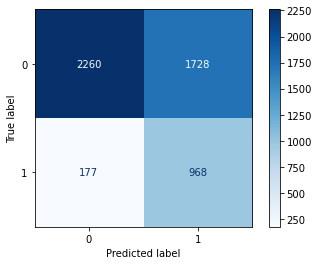

              precision    recall  f1-score   support

           0       0.93      0.57      0.70      3988
           1       0.36      0.85      0.50      1145

    accuracy                           0.63      5133
   macro avg       0.64      0.71      0.60      5133
weighted avg       0.80      0.63      0.66      5133



In [51]:
conf_matrix (X_test, y_test, preds, final_cl)

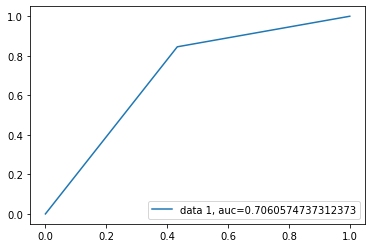

In [52]:
roc_curve(y_test, preds)

In [53]:
df_1.corr()

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
SYMPTOM_COUGH,1.000000,-0.000170,0.216184,0.337650,0.005929,0.007905,0.001995,0.160121,0.039871,0.045659,...,-0.006405,-0.003202,0.016831,0.018632,NaN,-0.007456,-0.001165,-0.001350,-0.019501,0.019832
SYMPTOM_COLD,-0.000170,1.000000,-0.001864,0.001174,-0.000357,-0.002624,-0.002200,0.015804,0.020731,0.032979,...,-0.001009,-0.000504,-0.004489,-0.003276,NaN,-0.004547,-0.016689,-0.041083,0.009396,-0.009385
SYMPTOM_AIR_INSUFFICIENCY,0.216184,-0.001864,1.000000,0.122521,0.008277,0.054472,0.020348,-0.123630,-0.075067,-0.009850,...,0.006687,0.000555,0.052363,0.038104,NaN,0.024363,0.246237,0.215046,-0.067205,0.067443
SYMPTOM_FEVER,0.337650,0.001174,0.122521,1.000000,0.006939,-0.007350,0.011885,0.109242,0.072473,0.101246,...,-0.008439,0.009813,-0.013209,0.006454,NaN,-0.007075,-0.005988,-0.031846,-0.078303,0.078587
SYMPTOM_LOW_OXYGEN_SATURATION,0.005929,-0.000357,0.008277,0.006939,1.000000,-0.000456,-0.000383,-0.004173,-0.002943,-0.002510,...,-0.000175,-0.000088,-0.000781,-0.000570,NaN,-0.000791,0.015227,0.011725,-0.008409,0.008412
SYMPTOM_BREATHING_CONDITION,0.007905,-0.002624,0.054472,-0.007350,-0.000456,1.000000,-0.002817,-0.017741,-0.005299,0.000067,...,-0.001291,-0.000645,0.016118,-0.004194,NaN,-0.005820,0.025272,-0.021291,-0.023175,0.023190
SYMPTOM_TORACIC_APERTURE,0.001995,-0.002200,0.020348,0.011885,-0.000383,-0.002817,1.000000,-0.019569,0.005234,0.033118,...,-0.001083,-0.000541,0.047284,0.032018,NaN,-0.004880,-0.009458,0.006407,-0.008324,0.008336
SYMPTOM_THROAT_CONDITION,0.160121,0.015804,-0.123630,0.109242,-0.004173,-0.017741,-0.019569,1.000000,0.133238,0.022155,...,-0.005074,-0.005901,-0.044905,-0.021685,NaN,-0.042656,-0.163462,-0.173792,0.080773,-0.080642
SYMPTOM_HEADACHE,0.039871,0.020731,-0.075067,0.072473,-0.002943,-0.005299,0.005234,0.133238,1.000000,0.266289,...,-0.008326,0.012816,0.003381,-0.008658,NaN,-0.022316,-0.125626,-0.116799,0.057444,-0.057352
SYMPTOM_BODY_PAIN,0.045659,0.032979,-0.009850,0.101246,-0.002510,0.000067,0.033118,0.022155,0.266289,1.000000,...,-0.007102,0.015691,0.031676,0.000746,NaN,-0.008304,-0.053008,-0.017747,0.003929,-0.003850


In [15]:
# perform permutation importance
results = permutation_importance(final_cl, X_over, y_over, scoring='precision')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Teste com o Período 2 (27/03/2020 até 22/09/2020):

In [54]:
#Periodo 2
data_inicio = df['data_notificacao'][0]+pd.Timedelta(days=30)
data_fim = df['data_notificacao'][0]+pd.Timedelta(days=210)

df_2 = df[(df['data_notificacao'] >= data_inicio) & (df['data_notificacao'] < data_fim )]
df_2 = df_2.reset_index()
df_2 = df_2.drop("index", axis=1)
df_2

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
0,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.730435,1,0,2020-03-27
1,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.600000,0,1,2020-03-27
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.504348,0,1,2020-03-27
3,1,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0.278261,1,0,2020-03-27
4,1,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0.286957,1,0,2020-03-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16380,1,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0.478261,0,1,2020-09-22
16381,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.660870,0,1,2020-09-22
16382,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0.208696,0,1,2020-09-22
16383,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.573913,0,1,2020-09-22


In [55]:
last_date_2 = df_2.iloc[16384]
last_date_2

SYMPTOM_COUGH                                          1
SYMPTOM_COLD                                           0
SYMPTOM_AIR_INSUFFICIENCY                              0
SYMPTOM_FEVER                                          0
SYMPTOM_LOW_OXYGEN_SATURATION                          0
SYMPTOM_BREATHING_CONDITION                            0
SYMPTOM_TORACIC_APERTURE                               0
SYMPTOM_THROAT_CONDITION                               0
SYMPTOM_HEADACHE                                       0
SYMPTOM_BODY_PAIN                                      0
SYMPTOM_DIARRHEA                                       0
SYMPTOM_RUNNY_NOSE                                     0
SYMPTOM_NOSE_CONGESTION                                0
SYMPTOM_WEAKNESS                                       0
SYMPTOM_ANOSMIA_OR_HYPOSMIA                            0
SYMPTOM_NAUSEA                                         0
SYMPTOM_LACK_OF_APPETITE                               0
SYMPTOM_ABDOMINAL_PAIN         

In [56]:
X_over, y_over, X_test, y_test, mean_test_scores, std_test_scores, best_scores, best_params = apply_model_svc(df_2)

########################################

best_score: 0.8580811163557692
best_params_: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
########################################



In [62]:
preds, final_cl = final_cl(X_over, y_over, X_test, y_test, 1, 1, 'rbf')

accuracy_score: <function accuracy_score at 0x0000013C39159790>
########################################
"""Métricas f1_score:"""
f1:  0.4253092293054234
Macro:  0.5998417644472579
Micro:  0.6759656652360515
weighted:  0.7060219655474941
########################################
"""Métricas precision_score:"""
Precision:  0.32580174927113703
Macro:  0.602841451885144
Micro:  0.6759656652360515
weighted:  0.7713838460719916


In [60]:
# parametrizando o modelo final
final_cl = SVC(C=1, gamma=1, kernel='rbf')

#treinando o modelo final
final_cl.fit(X_over, y_over)


preds = final_cl.predict(X_test)

accuracy_score(y_test, preds)

print('accuracy_score:', accuracy_score(y_test, preds))
print('#'*40)

print('"""Métricas f1_score:"""')
print('f1: ', f1_score(y_test, preds))
print('Macro: ', f1_score(y_test, preds, average='macro'))
print('Micro: ', f1_score(y_test, preds, average='micro'))
print('weighted: ', f1_score(y_test, preds, average='weighted'))
print('#'*40)
print('"""Métricas precision_score:"""')
print('Precision: ', precision_score(y_test, preds))
print('Macro: ', precision_score(y_test, preds, average='macro'))
print('Micro: ', precision_score(y_test, preds, average='micro'))
print('weighted: ', precision_score(y_test, preds, average='weighted'))

accuracy_score: 0.635461373390558
########################################
"""Métricas f1_score:"""
f1:  0.46305807981035163
Macro:  0.5935594967579677
Micro:  0.635461373390558
weighted:  0.6729525261670861
########################################
"""Métricas precision_score:"""
Precision:  0.32537479178234313
Macro:  0.6253236179980735
Micro:  0.635461373390558
weighted:  0.8078032150627934


c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


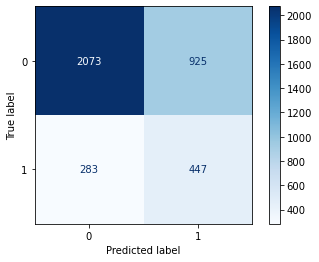

              precision    recall  f1-score   support

           0       0.88      0.69      0.77      2998
           1       0.33      0.61      0.43       730

    accuracy                           0.68      3728
   macro avg       0.60      0.65      0.60      3728
weighted avg       0.77      0.68      0.71      3728



In [63]:
conf_matrix (X_test, y_test, preds, final_cl)

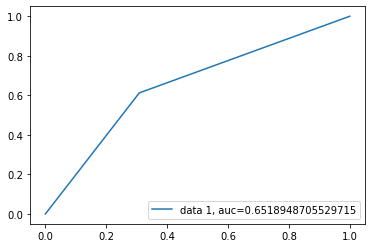

In [64]:
roc_curve(y_test, preds)

In [65]:
df_2.corr()

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
SYMPTOM_COUGH,1.000000,0.000146,0.208287,0.318400,0.005789,0.012777,0.002240,0.147969,0.026547,0.039916,...,-0.006724,-0.003361,0.022044,0.015606,NaN,-0.008039,-0.010350,-0.013536,-0.021137,0.021468
SYMPTOM_COLD,0.000146,1.000000,-0.002529,-0.000683,-0.000356,-0.003234,-0.002312,0.015899,0.020902,0.031536,...,-0.001008,-0.000504,-0.005030,-0.003519,NaN,0.008110,-0.017446,-0.037949,0.010849,-0.010838
SYMPTOM_AIR_INSUFFICIENCY,0.208287,-0.002529,1.000000,0.098414,0.007839,0.064240,0.021896,-0.133098,-0.083578,-0.019085,...,0.005600,0.000037,0.062528,0.039242,NaN,0.026774,0.232249,0.191721,-0.066380,0.066625
SYMPTOM_FEVER,0.318400,-0.000683,0.098414,1.000000,0.006838,-0.007735,0.012707,0.107418,0.069376,0.100386,...,-0.008529,0.009670,-0.017572,0.003329,NaN,-0.009903,-0.013565,-0.041861,-0.080041,0.080322
SYMPTOM_LOW_OXYGEN_SATURATION,0.005789,-0.000356,0.007839,0.006838,1.000000,-0.000554,-0.000396,-0.004037,-0.002847,-0.002504,...,-0.000173,-0.000086,-0.000862,-0.000603,NaN,-0.000821,0.014868,0.011299,-0.008268,0.008270
SYMPTOM_BREATHING_CONDITION,0.012777,-0.003234,0.064240,-0.007735,-0.000554,1.000000,-0.003595,-0.019682,-0.007027,-0.001896,...,-0.001567,-0.000784,0.008047,-0.005473,NaN,0.000867,0.019448,-0.027077,-0.017879,0.017897
SYMPTOM_TORACIC_APERTURE,0.002240,-0.002312,0.021896,0.012707,-0.000396,-0.003595,1.000000,-0.020276,0.004036,0.029440,...,-0.001120,-0.000560,0.038706,0.027556,NaN,-0.005328,-0.009049,0.006604,-0.005291,0.005303
SYMPTOM_THROAT_CONDITION,0.147969,0.015899,-0.133098,0.107418,-0.004037,-0.019682,-0.020276,1.000000,0.126137,0.020292,...,-0.004647,-0.005709,-0.043273,-0.024271,NaN,-0.044229,-0.159939,-0.170029,0.075789,-0.075664
SYMPTOM_HEADACHE,0.026547,0.020902,-0.083578,0.069376,-0.002847,-0.007027,0.004036,0.126137,1.000000,0.273573,...,-0.008055,0.013146,0.001573,-0.008340,NaN,-0.021875,-0.122841,-0.109006,0.054025,-0.053936
SYMPTOM_BODY_PAIN,0.039916,0.031536,-0.019085,0.100386,-0.002504,-0.001896,0.029440,0.020292,0.273573,1.000000,...,-0.007083,0.015468,0.030160,-0.000093,NaN,-0.005396,-0.054143,-0.018895,0.002874,-0.002796


In [ ]:
# perform permutation importance
results = permutation_importance(final_cl, X_over, y_over, scoring='precision')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Teste com o Período 3 (26/04/2020 até 22/10/2020):

In [66]:
#Periodo 2
data_inicio = df['data_notificacao'][0]+pd.Timedelta(days=60)
data_fim = df['data_notificacao'][0]+pd.Timedelta(days=240)

df_3 = df[(df['data_notificacao'] >= data_inicio) & (df['data_notificacao'] < data_fim )]
df_3 = df_3.reset_index()
df_3 = df_3.drop("index", axis=1)
df_3

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0.652174,0,1,2020-04-26
1,1,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0.443478,0,1,2020-04-26
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.782609,1,0,2020-04-26
3,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.747826,1,0,2020-04-26
4,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0.452174,1,0,2020-04-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12366,1,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0.495652,1,0,2020-10-22
12367,1,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0.747826,1,0,2020-10-22
12368,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.434783,0,1,2020-10-22
12369,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.608696,1,0,2020-10-22


In [67]:
last_date_3 = df_3.iloc[12370]
last_date_3

SYMPTOM_COUGH                                          1
SYMPTOM_COLD                                           0
SYMPTOM_AIR_INSUFFICIENCY                              1
SYMPTOM_FEVER                                          0
SYMPTOM_LOW_OXYGEN_SATURATION                          0
SYMPTOM_BREATHING_CONDITION                            0
SYMPTOM_TORACIC_APERTURE                               0
SYMPTOM_THROAT_CONDITION                               0
SYMPTOM_HEADACHE                                       0
SYMPTOM_BODY_PAIN                                      1
SYMPTOM_DIARRHEA                                       1
SYMPTOM_RUNNY_NOSE                                     0
SYMPTOM_NOSE_CONGESTION                                0
SYMPTOM_WEAKNESS                                       0
SYMPTOM_ANOSMIA_OR_HYPOSMIA                            0
SYMPTOM_NAUSEA                                         0
SYMPTOM_LACK_OF_APPETITE                               0
SYMPTOM_ABDOMINAL_PAIN         

In [68]:
X_over, y_over, X_test, y_test, mean_test_scores, std_test_scores, best_scores, best_params = apply_model_svc(df_3)

########################################

best_score: 0.8220966564033066
best_params_: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
########################################



In [74]:
preds, final_cl = final_cl(X_over, y_over, X_test, y_test, 10, 1, 'rbf')

accuracy_score: 0.672107363075807
########################################
"""Métricas f1_score:"""
f1:  0.4197689345314506
Macro:  0.5956276421898912
Micro:  0.672107363075807
weighted:  0.6999181706706856
########################################
"""Métricas precision_score:"""
Precision:  0.3279839518555667
Macro:  0.5975147032005106
Micro:  0.672107363075807
weighted:  0.7573561172190029


c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


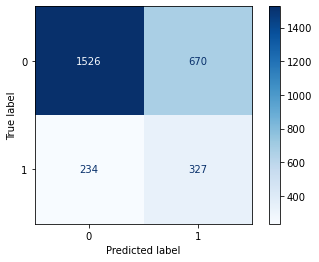

              precision    recall  f1-score   support

           0       0.87      0.69      0.77      2196
           1       0.33      0.58      0.42       561

    accuracy                           0.67      2757
   macro avg       0.60      0.64      0.60      2757
weighted avg       0.76      0.67      0.70      2757



In [75]:
conf_matrix (X_test, y_test, preds, final_cl)

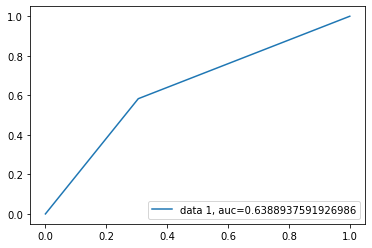

In [76]:
roc_curve(y_test, preds)

In [77]:
df_3.corr()

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
SYMPTOM_COUGH,1.000000,-0.007405,0.199304,0.287847,0.006659,0.015049,0.005444,0.119838,0.016743,0.040162,...,-0.014402,-0.003876,0.034230,0.019097,NaN,-0.009673,-0.030684,-0.031094,-0.029714,0.029714
SYMPTOM_COLD,-0.007405,1.000000,-0.019719,-0.003413,-0.000428,-0.004054,-0.002973,0.002165,0.002429,0.010093,...,-0.001212,-0.000606,-0.006599,-0.004278,NaN,0.008814,-0.023024,-0.050151,0.013389,-0.013389
SYMPTOM_AIR_INSUFFICIENCY,0.199304,-0.019719,1.000000,0.040891,0.007929,0.065430,0.023586,-0.121748,-0.119548,-0.052214,...,0.009613,-0.001603,0.065845,0.040802,NaN,0.012049,0.171514,0.135433,-0.037326,0.037326
SYMPTOM_FEVER,0.287847,-0.003413,0.040891,1.000000,0.007791,-0.007411,0.006788,0.115531,0.069467,0.097998,...,-0.010083,0.011018,-0.028937,-0.002835,NaN,-0.019213,-0.044370,-0.073753,-0.063464,0.063464
SYMPTOM_LOW_OXYGEN_SATURATION,0.006659,-0.000428,0.007929,0.007791,1.000000,-0.000765,-0.000561,-0.003951,-0.003413,-0.003190,...,-0.000229,-0.000114,-0.001246,-0.000808,NaN,-0.001071,0.015866,0.011626,-0.009033,0.009033
SYMPTOM_BREATHING_CONDITION,0.015049,-0.004054,0.065430,-0.007411,-0.000765,1.000000,-0.005313,-0.016628,-0.009250,-0.002882,...,-0.002165,-0.001082,0.002278,-0.007646,NaN,-0.001992,0.016427,-0.035054,-0.016652,0.016652
SYMPTOM_TORACIC_APERTURE,0.005444,-0.002973,0.023586,0.006788,-0.000561,-0.005313,1.000000,-0.020363,0.007661,0.023247,...,-0.001588,-0.000794,0.039177,0.038174,NaN,0.014713,-0.011117,0.005381,-0.002888,0.002888
SYMPTOM_THROAT_CONDITION,0.119838,0.002165,-0.121748,0.115531,-0.003951,-0.016628,-0.020363,1.000000,0.149418,0.023813,...,-0.011178,-0.005587,-0.043119,-0.027149,NaN,-0.044853,-0.133358,-0.143837,0.044067,-0.044067
SYMPTOM_HEADACHE,0.016743,0.002429,-0.119548,0.069467,-0.003413,-0.009250,0.007661,0.149418,1.000000,0.263518,...,-0.009656,0.014336,-0.009578,-0.009483,NaN,-0.026532,-0.138423,-0.120398,0.053314,-0.053314
SYMPTOM_BODY_PAIN,0.040162,0.010093,-0.052214,0.097998,-0.003190,-0.002882,0.023247,0.023813,0.263518,1.000000,...,-0.009025,0.015666,0.026328,-0.003074,NaN,-0.005113,-0.066481,-0.029275,0.008883,-0.008883


In [ ]:
# perform permutation importance
results = permutation_importance(final_cl, X_over, y_over, scoring='precision')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()